# Notebook to check Annotation of clusters after batch correction using `BBKNN`

**Created by :** Srivalli Kolla

**Created on :** 13 June, 2025

**Modified on :** 13 June, 2025

**University of Würzburg**

Env : scanpy (Python 3.12.2)

# Importing Packages

In [97]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [98]:
sc.settings.verbosity = 3
sc.logging.print_versions()

plt.rcParams['figure.dpi'] = 300  
plt.rcParams['savefig.dpi'] = 300

timestamp = datetime.datetime.now().strftime("%d_%m_%y")

/tmp/ipykernel_178393/4146390281.py:2: FutureWarning: Use `print_header` instead
  sc.logging.print_versions()


# Data import

In [99]:
cd './Github/ACM_sn_2025'

[Errno 2] No such file or directory: './Github/ACM_sn_2025'
/home/gruengroup/srivalli/Github/ACM_sn_2025


In [100]:
adata = sc.read_h5ad('./data/acm_bbknn_annotated_12_06_25.h5ad')
adata

AnnData object with n_obs × n_vars = 138680 × 8000
    obs: 'sample', 'Sample_Name', 'Sex', 'Genotype', 'Treatment', 'Condition', 'Sample_ID', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'percent_chrY', 'XIST-counts', 'XIST-percentage', 'gender_check_cov', 'S_score', 'G2M_score', 'phase', 'leiden_1', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.5', 'B cells_score', 'Cardiomyocytes_score', 'Dendritic cells_score', 'Fibroblasts_score', 'ILC2_score', 'MAIT-like_score', 'Mast cells_score', 'Macrophages_score', 'Neutrophils_score', 'NK cells_score', 'Schwann cells_score', 'T cells_score', 'Endothelial cells_score', 'Vascular - Epicardial-derived cells_score', 'Pericytes_score', 'Smooth muscle cells_score', 'celltype_marker_genes', 'celltype_de_genes', 'celltype_de_group'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly

#### Check if data is raw or Normalized

In [101]:
def X_is_raw(adata):
    return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

In [102]:
print(X_is_raw(adata))

False


In [103]:
adata.X = adata.layers['cpm_normalization']

In [104]:
print(X_is_raw(adata))

False


# Annotation Check - Per Cluster

## Based on all Marker Genes

In [105]:
cluster_key = 'leiden_1'
marker_scores_1 = ['Cardiomyocytes_score','B cells_score',  'Dendritic cells_score', 'Fibroblasts_score', 'ILC2_score', 'MAIT-like_score', 'Mast cells_score', 'Macrophages_score', 'Neutrophils_score', 'NK cells_score', 'Schwann cells_score', 'T cells_score', 'Endothelial cells_score', 'Vascular - Epicardial-derived cells_score', 'Pericytes_score', 'Smooth muscle cells_score']
cluster_scores = adata.obs.groupby(cluster_key)[marker_scores_1].mean().round(2)

/tmp/ipykernel_178393/2175986728.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_scores = adata.obs.groupby(cluster_key)[marker_scores_1].mean().round(2)


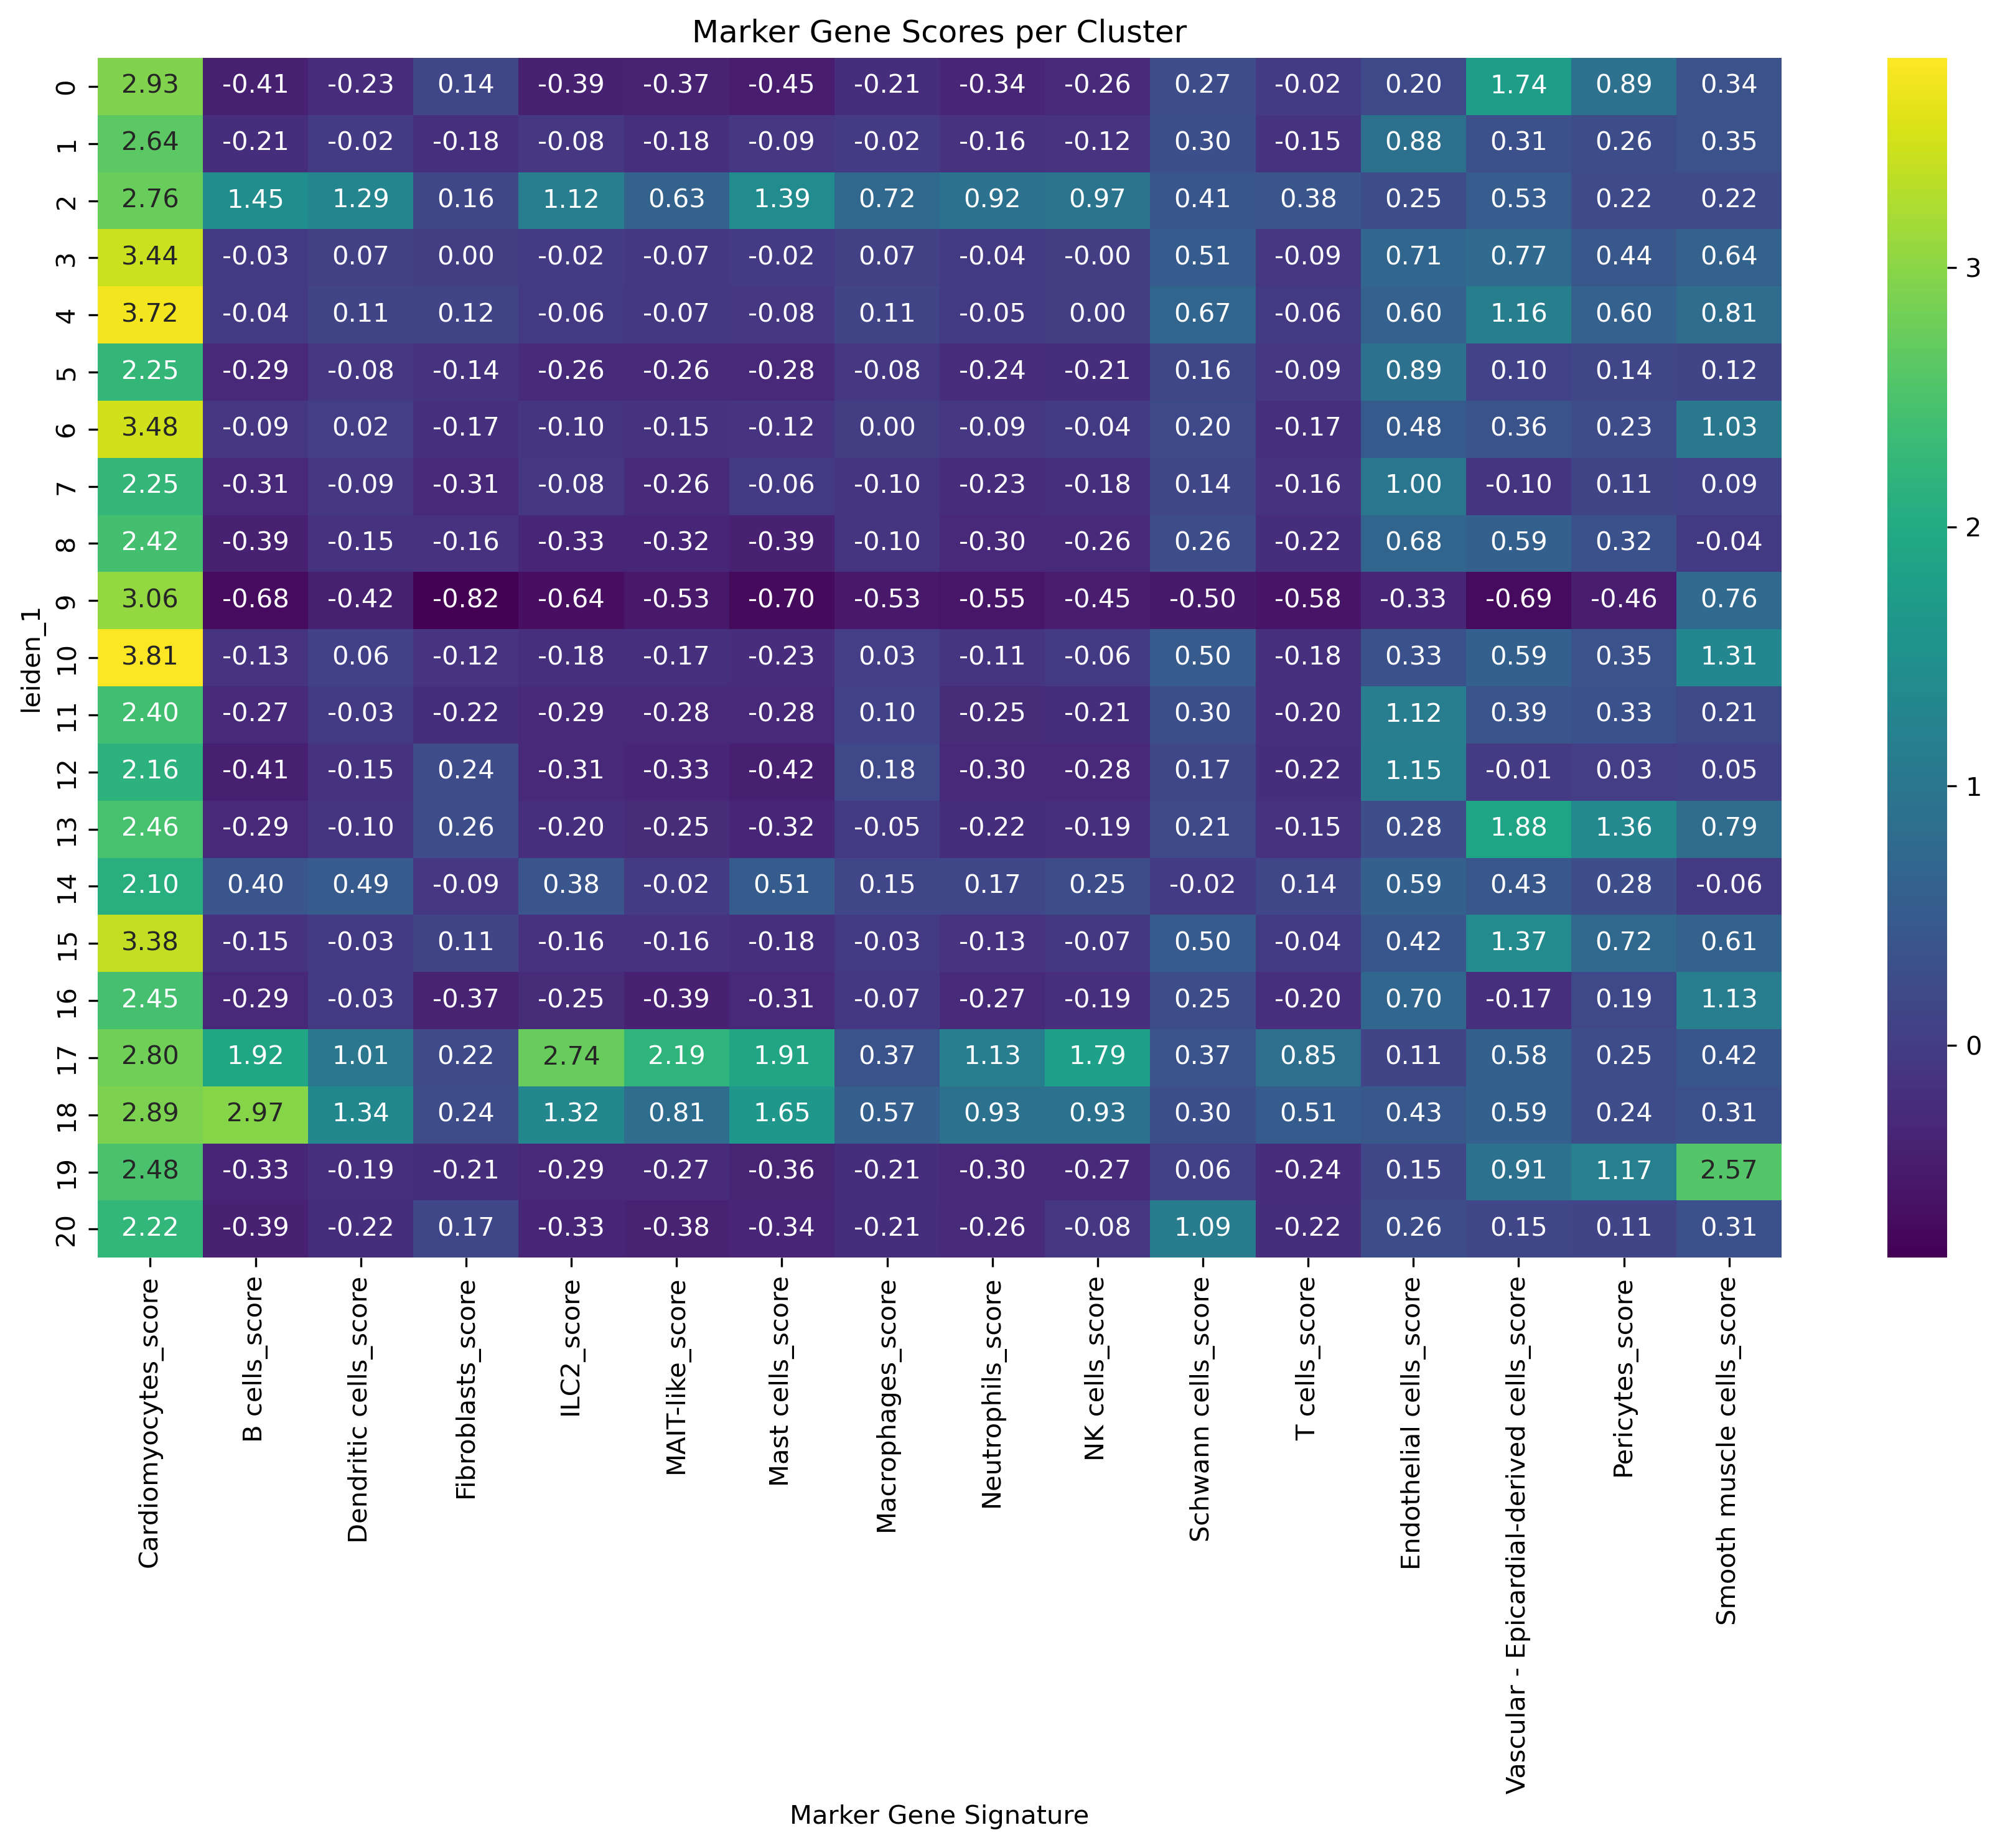

In [106]:
plt.figure(figsize=(12, 10))
sb.heatmap(cluster_scores, annot=True, fmt=".2f", cmap="viridis")
plt.title("Marker Gene Scores per Cluster")
plt.xlabel("Marker Gene Signature")
plt.ylabel(cluster_key)
plt.tight_layout()
plt.show()

## Based on Marker Genes without Cardiomyocytes

In [107]:
cluster_key = 'leiden_1'
marker_scores_2 = ['B cells_score',  'Dendritic cells_score', 'Fibroblasts_score', 'ILC2_score', 'MAIT-like_score', 'Mast cells_score', 'Macrophages_score', 'Neutrophils_score', 'NK cells_score', 'Schwann cells_score', 'T cells_score', 'Endothelial cells_score', 'Vascular - Epicardial-derived cells_score', 'Pericytes_score', 'Smooth muscle cells_score']
cluster_scores_2 = adata.obs.groupby(cluster_key)[marker_scores_2].mean().round(2)

/tmp/ipykernel_178393/3413061331.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_scores_2 = adata.obs.groupby(cluster_key)[marker_scores_2].mean().round(2)


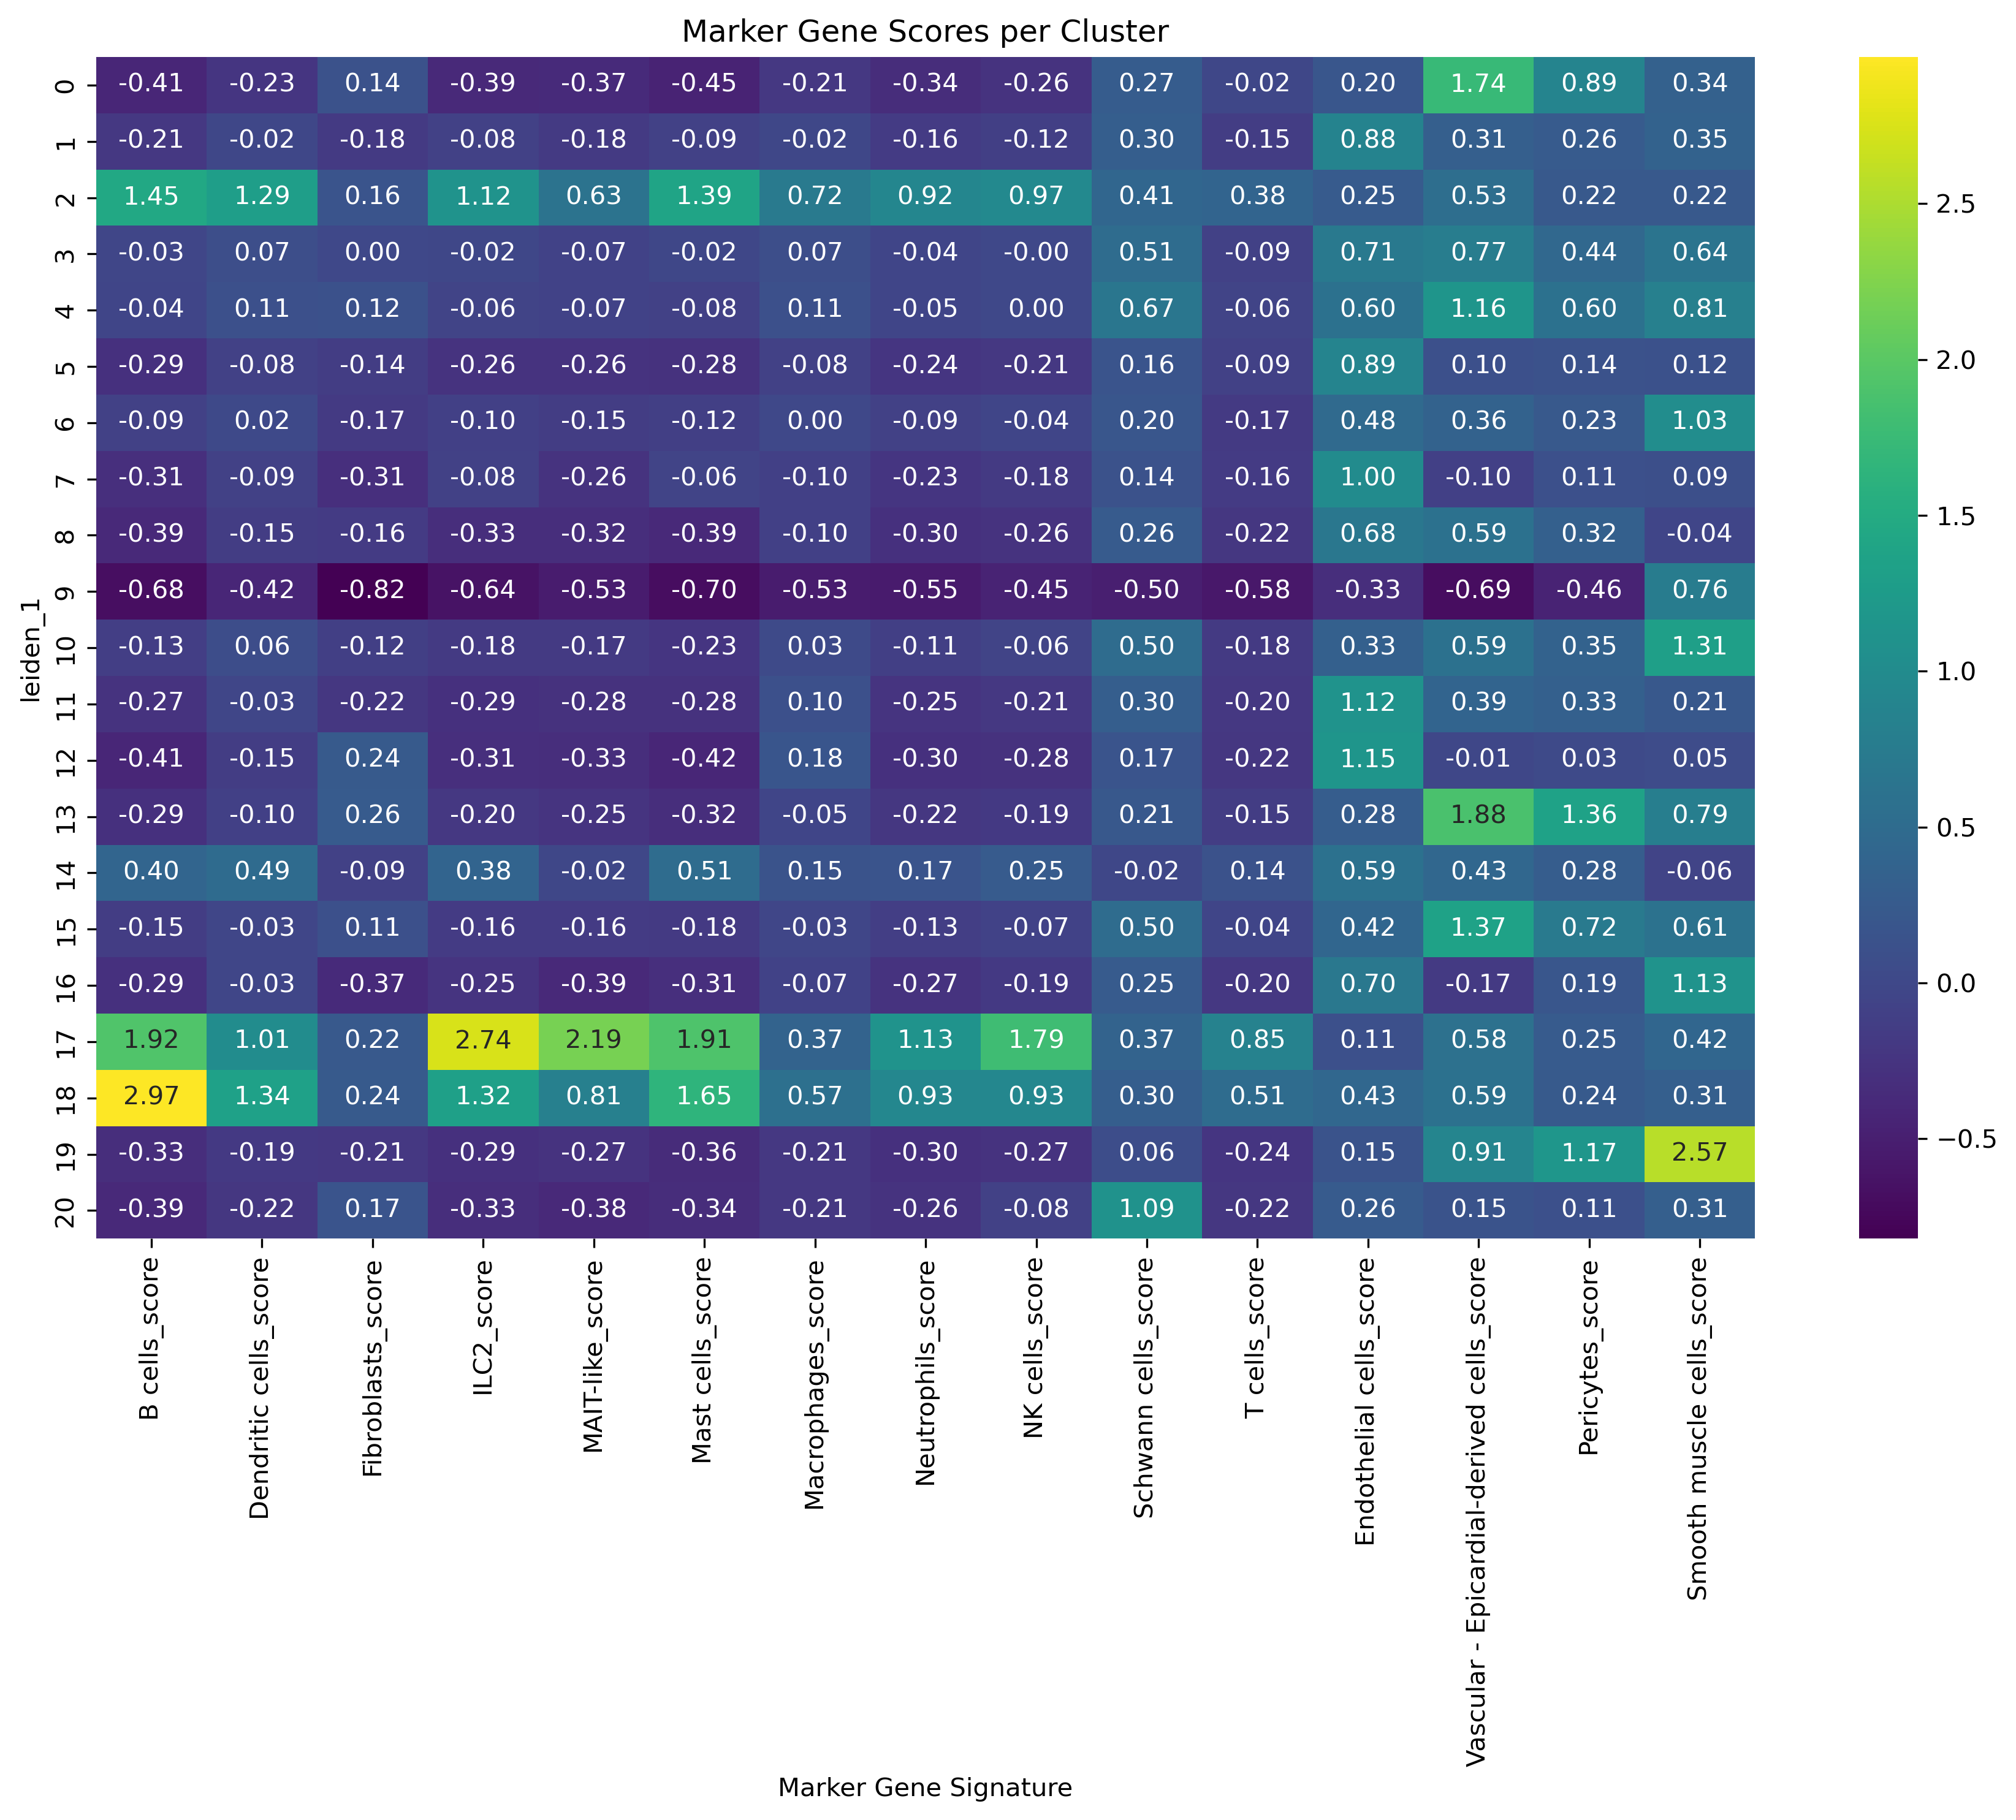

In [108]:
plt.figure(figsize=(12, 10))
sb.heatmap(cluster_scores_2, annot=True, fmt=".2f", cmap="viridis")
plt.title("Marker Gene Scores per Cluster")
plt.xlabel("Marker Gene Signature")
plt.ylabel(cluster_key)
plt.tight_layout()
plt.show()

## Highly expressed marker genes

In [109]:
cluster_key = 'leiden_1'


# Calculate mean scores per cluster
avg_scores = adata.obs.groupby(cluster_key)[marker_scores_1].mean()

# Initialize list to collect rows
top2_rows = []

for cluster, row in avg_scores.iterrows():
    top2 = row.nlargest(2)
    top2_rows.append({
        'Cluster': cluster,
        'Top1_Marker': top2.index[0],
        'Top1_Score': round(top2.iloc[0], 3),
        'Top2_Marker': top2.index[1],
        'Top2_Score': round(top2.iloc[1], 3)
    })

# Convert to DataFrame
top2_df = pd.DataFrame(top2_rows)

# Display the result
top2_df

/tmp/ipykernel_178393/2517112725.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_scores = adata.obs.groupby(cluster_key)[marker_scores_1].mean()


,Cluster,Top1_Marker,Top1_Score,Top2_Marker,Top2_Score
0,0,Cardiomyocytes_score,2.932,Vascular - Epicardial-derived cells_score,1.743
1,1,Cardiomyocytes_score,2.640,Endothelial cells_score,0.877
2,2,Cardiomyocytes_score,2.758,B cells_score,1.454
3,3,Cardiomyocytes_score,3.439,Vascular - Epicardial-derived cells_score,0.775
4,4,Cardiomyocytes_score,3.715,Vascular - Epicardial-derived cells_score,1.162
5,5,Cardiomyocytes_score,2.252,Endothelial cells_score,0.889
6,6,Cardiomyocytes_score,3.484,Smooth muscle cells_score,1.030
7,7,Cardiomyocytes_score,2.251,Endothelial cells_score,1.004
8,8,Cardiomyocytes_score,2.415,Endothelial cells_score,0.683
9,9,Cardiomyocytes_score,3.062,Smooth muscle cells_score,0.764


In [110]:
top2_marker_dict = {
    0: "Vascular - Epicardial-derived cells_score",
    1: "Endothelial cells_score",
    2: "B cells_score",
    3: "Vascular - Epicardial-derived cells_score",
    4: "Vascular - Epicardial-derived cells_score",
    5: "Endothelial cells_score",
    6: "Smooth muscle cells_score",
    7: "Endothelial cells_score",
    8: "Endothelial cells_score",
    9: "Smooth muscle cells_score",
    10: "Smooth muscle cells_score",
    11: "Endothelial cells_score",
    12: "Endothelial cells_score",
    13: "Vascular - Epicardial-derived cells_score",
    14: "Endothelial cells_score",
    15: "Vascular - Epicardial-derived cells_score",
    16: "Smooth muscle cells_score",
    17: "ILC2_score",
    18: "Cardiomyocytes_score",
    19: "Cardiomyocytes_score",
    20: "Schwann cells_score"
}

adata.obs['celltype_top2_marker'] = adata.obs['leiden_1'].astype(int).map(top2_marker_dict)

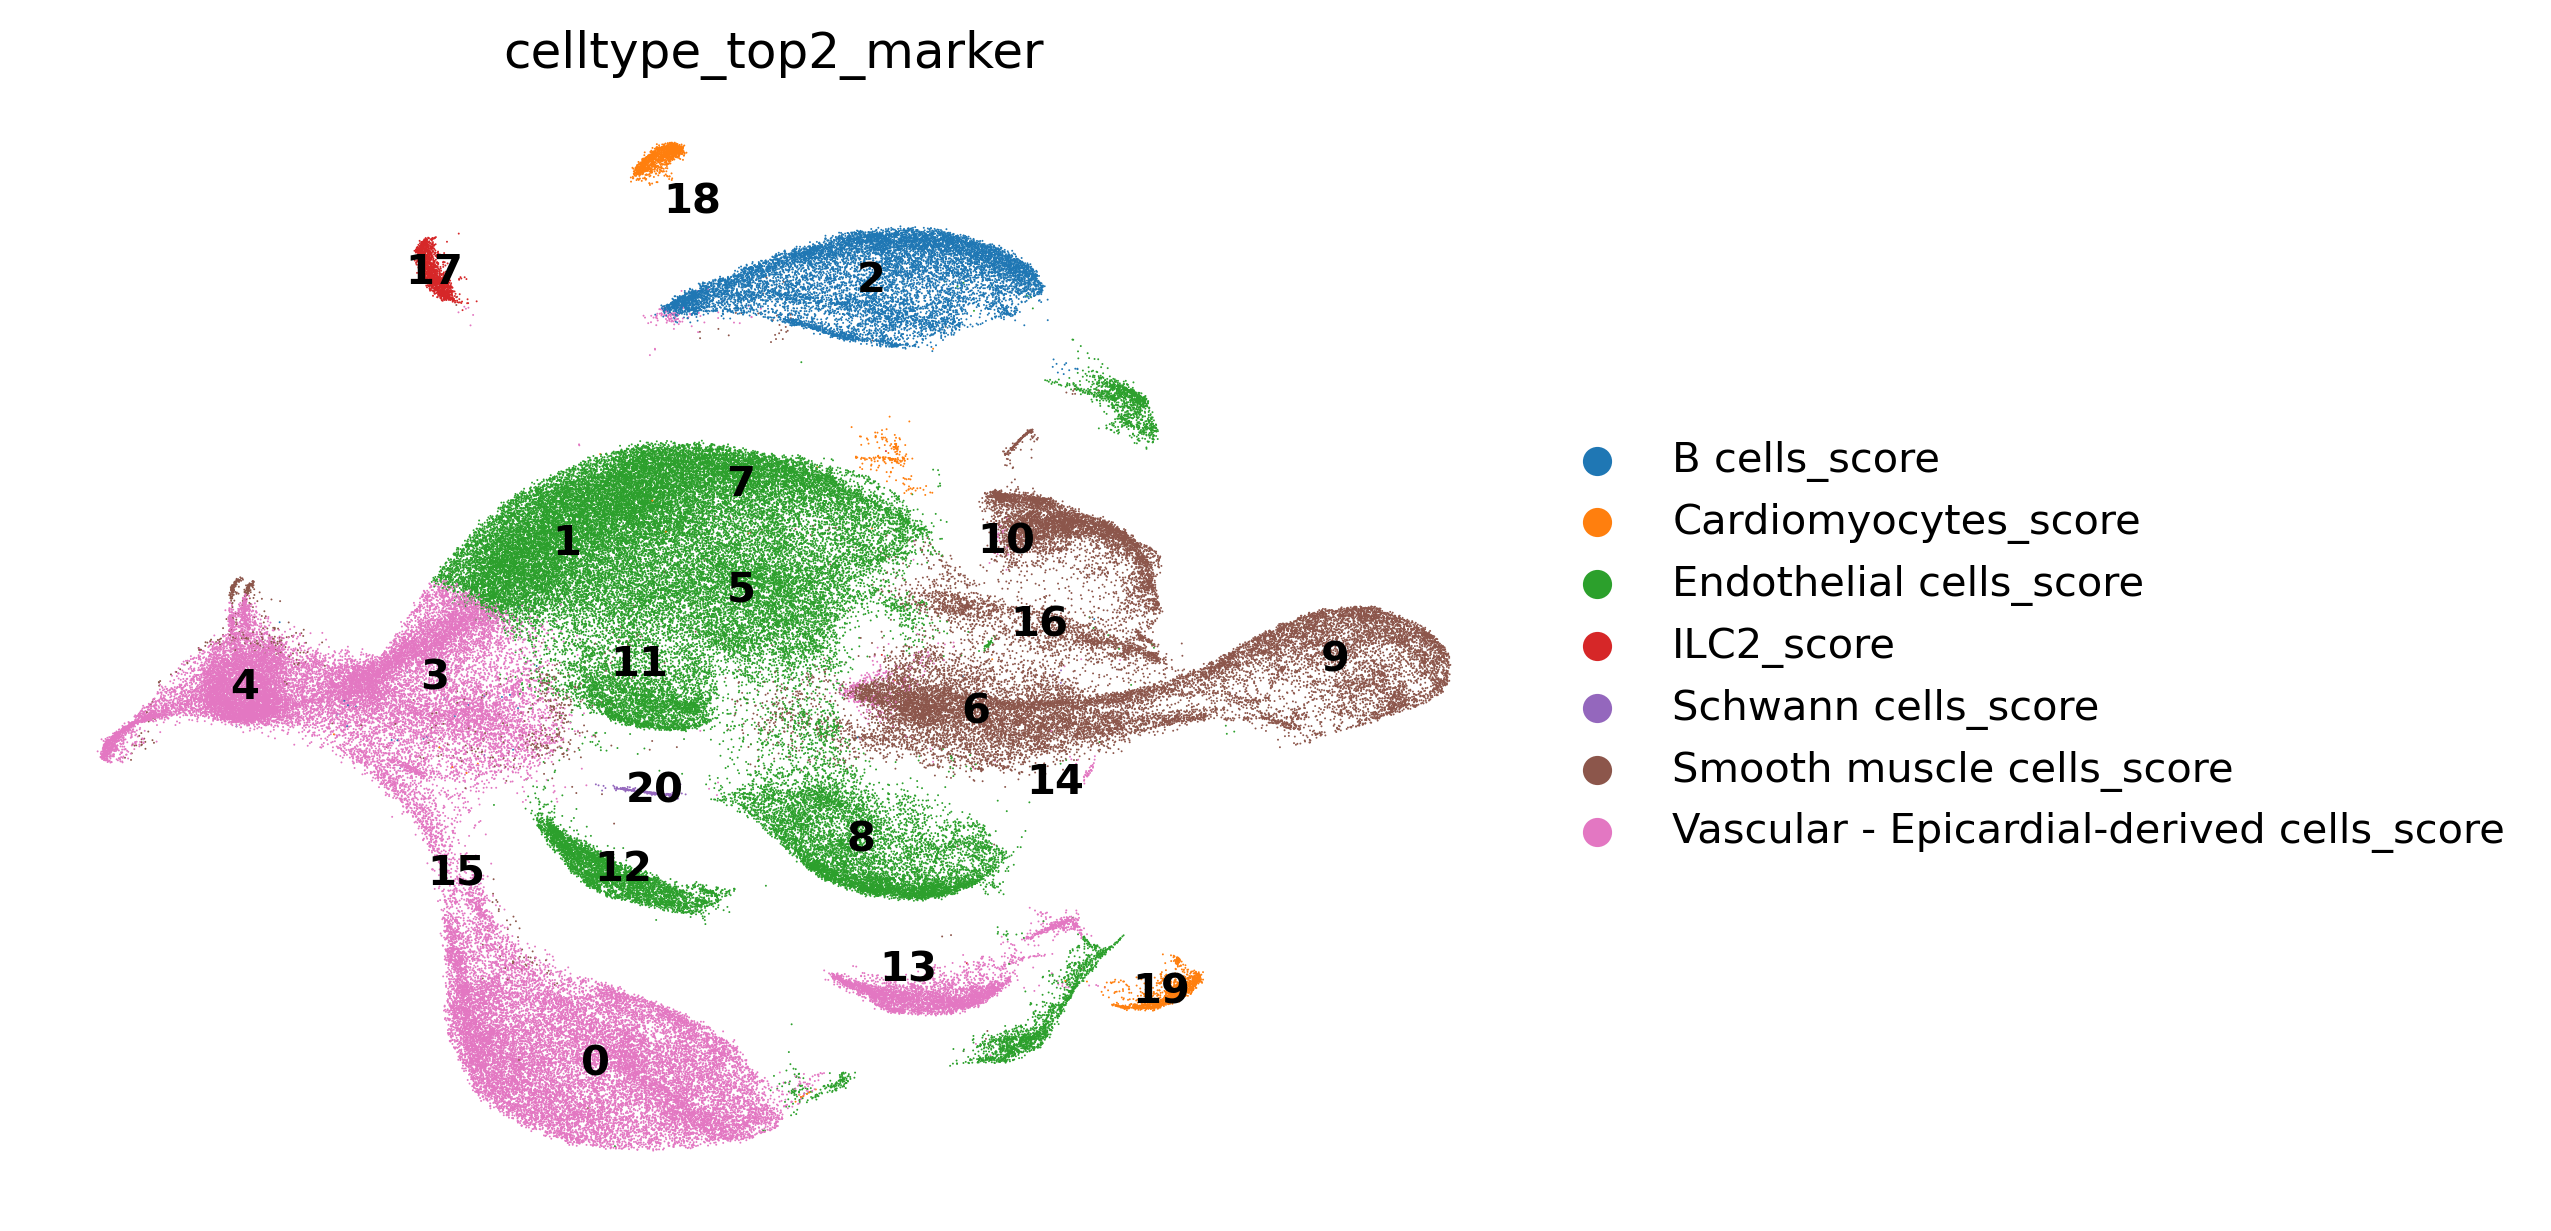

In [112]:
sc.pl.umap(adata, color='celltype_top2_marker', frameon=False, show=False)

# Adding leiden cluster numbers
umap_coords = adata.obsm['X_umap']
leiden_labels = adata.obs['leiden_1']

# Compute cluster centers
cluster_centers = []
for cluster in leiden_labels.cat.categories:
    indices = np.where(leiden_labels == cluster)[0]
    x = np.mean(umap_coords[indices, 0])
    y = np.mean(umap_coords[indices, 1])
    cluster_centers.append((x, y))

# Add cluster numbers to the existing plot
for i, (x, y) in enumerate(cluster_centers):
    plt.text(x, y, str(i), color='black', fontsize=10, weight='bold', ha='center', va='center')
